.


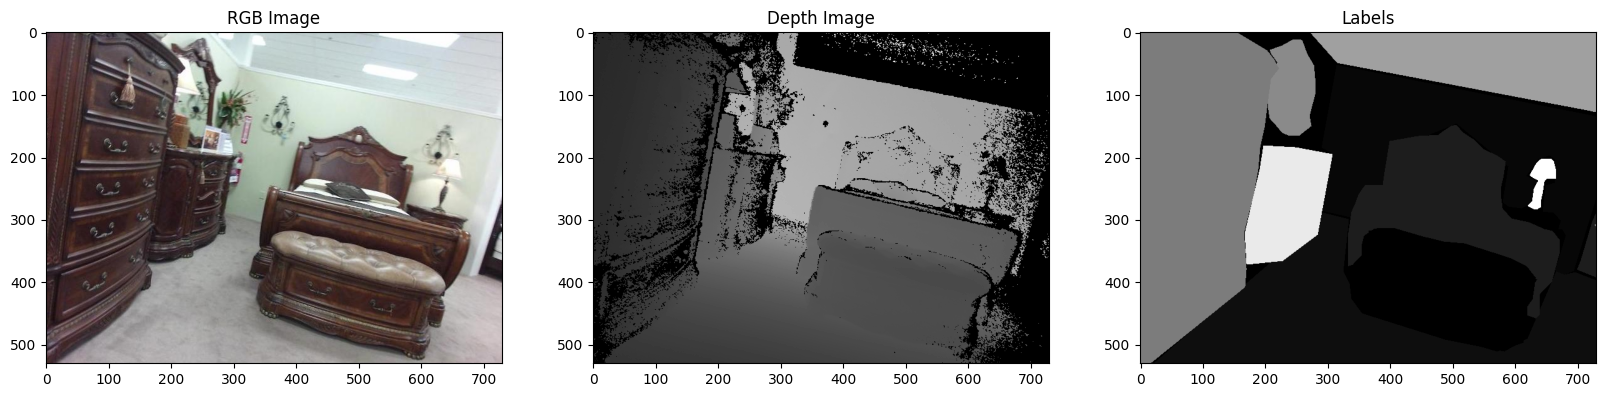

(530, 730) (530, 730, 3) (530, 730)
(530, 730, 3) (386900,) (1160700,) (2321400,) (2321400,)


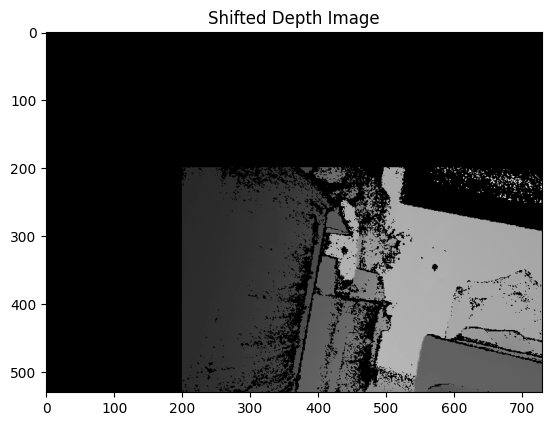

Mutual Information (RGB + Depth): 0.8013466491407939
Mutual Information (RGB): 0.6650582556461642
Mutual Information (Depth): 0.9376497963661263
Mutual Information (Shifted Depth): 0.5363584192287576
Mutual Information (GT): 1.9575195747001664
Mutual Information (Black): 0.0


In [25]:
import PIL.Image as Image
import torchvision.transforms.functional as F
import matplotlib.pyplot as plt

from sklearn.metrics import mutual_info_score
import numpy as np

rgb_sunrgbd_path = r"..\datasets\SUNRGBD\RGB_original"
depth_sunrgbd_path = r"..\datasets\SUNRGBD\Depth_original"
label_sunrgbd_path = r"..\datasets\SUNRGBD\labels"

example_rgb = rgb_sunrgbd_path + r"\test_0.jpg"
example_depth = depth_sunrgbd_path + r"\test_0.png"
example_label = label_sunrgbd_path + r"\test_0.png"

test = rgb_sunrgbd_path + f"/test_{i}.jpg"
print(test[1])

depth_images = np.array(Image.open(example_depth))
rgb_images = np.array(Image.open(example_rgb))
labels = np.array(Image.open(example_label))

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
ax[0].imshow(rgb_images)
ax[0].set_title("RGB Image")
ax[1].imshow(depth_images, cmap="gray")
ax[1].set_title("Depth Image")
ax[2].imshow(labels, cmap="gray")
ax[2].set_title("Labels")
plt.show()

print(depth_images.shape, rgb_images.shape, labels.shape)
# Assuming you have labels, RGB images, and depth images as numpy arrays
# labels.shape = (height, width)
# rgb_images.shape = (height, width, 3)
# depth_images.shape = (height, width)

# Expand the labels to create the same shape as RGB
labels_rgb = np.expand_dims(labels, axis=-1)
labels_rgb = np.repeat(labels_rgb, 3, axis=-1)

depth_3c = np.expand_dims(depth_images, axis=-1)
depth_3c = np.repeat(depth_3c, 3, axis=-1)
rgbd = np.concatenate([rgb_images, depth_3c], axis=-1)

labels_rgbd = np.expand_dims(labels, axis=-1)
labels_rgbd = np.repeat(labels_rgbd, 6, axis=-1)
labels_rgbd_flat = labels_rgbd.flatten()

# Flatten the depth and RGB images to match the shape of labels
depth_flat = depth_images.flatten()
rgb_flat = rgb_images.flatten()
rgbd_flat = rgbd.flatten()
print(labels_rgb.shape, depth_flat.shape, rgb_flat.shape, rgbd_flat.shape, labels_rgbd_flat.shape)

# Shift depth image 50 pixels down and 50 pixels right
depth_shifted = np.zeros_like(depth_images)
shift = 200
depth_shifted[shift:, shift:] = depth_images[:-shift, :-shift]
depth_shifted_flat = depth_shifted.flatten()

# Calculate mutual information between RGB images and labels
mi_rgb = mutual_info_score(labels_rgb.flatten(), rgb_flat)

# Calculate mutual information between depth images and labels
mi_depth = mutual_info_score(labels.flatten(), depth_flat)

mi_shifted_depth = mutual_info_score(labels.flatten(), depth_shifted_flat)
plt.imshow(depth_shifted, cmap="gray")
plt.title("Shifted Depth Image")
plt.show()

# Calculate mutual information between RGB and depth images and labels
mi_rgb_depth = mutual_info_score(labels_rgbd_flat, rgbd_flat)

mi_gt = mutual_info_score(labels.flatten(), labels.flatten())
mi_black = mutual_info_score(labels.flatten(), np.zeros_like(labels.flatten()))

# Print the mutual information scores
print("Mutual Information (RGB + Depth):", mi_rgb_depth)
print("Mutual Information (RGB):", mi_rgb)
print("Mutual Information (Depth):", mi_depth)
print("Mutual Information (Shifted Depth):", mi_shifted_depth)
print("Mutual Information (GT):", mi_gt)
print("Mutual Information (Black):", mi_black)
